# Flight Price Prediction
---

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Importing dataset

In [366]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [367]:
train_data = pd.read_excel(r"/Users/atanumondal/Desktop/study/flight_price-prediction-main/archive/Data_Train.xlsx")

In [368]:
train_data.shape

(10683, 11)

In [369]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [370]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [371]:
train_data.dropna(inplace = True)#row wise

In [372]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

# From description we can see that Date_of_Journey is a object data type

In [373]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [374]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [375]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [376]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [377]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [378]:
#train_data.head()

In [379]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [380]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [381]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [382]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [383]:
train_data.drop(["Duration"], axis = 1, inplace = True)

---

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. Nominal data--> data are not in any order --> OneHotEncoder
2. Ordinal data --> data are in order --> LabelEncoder

In [384]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False


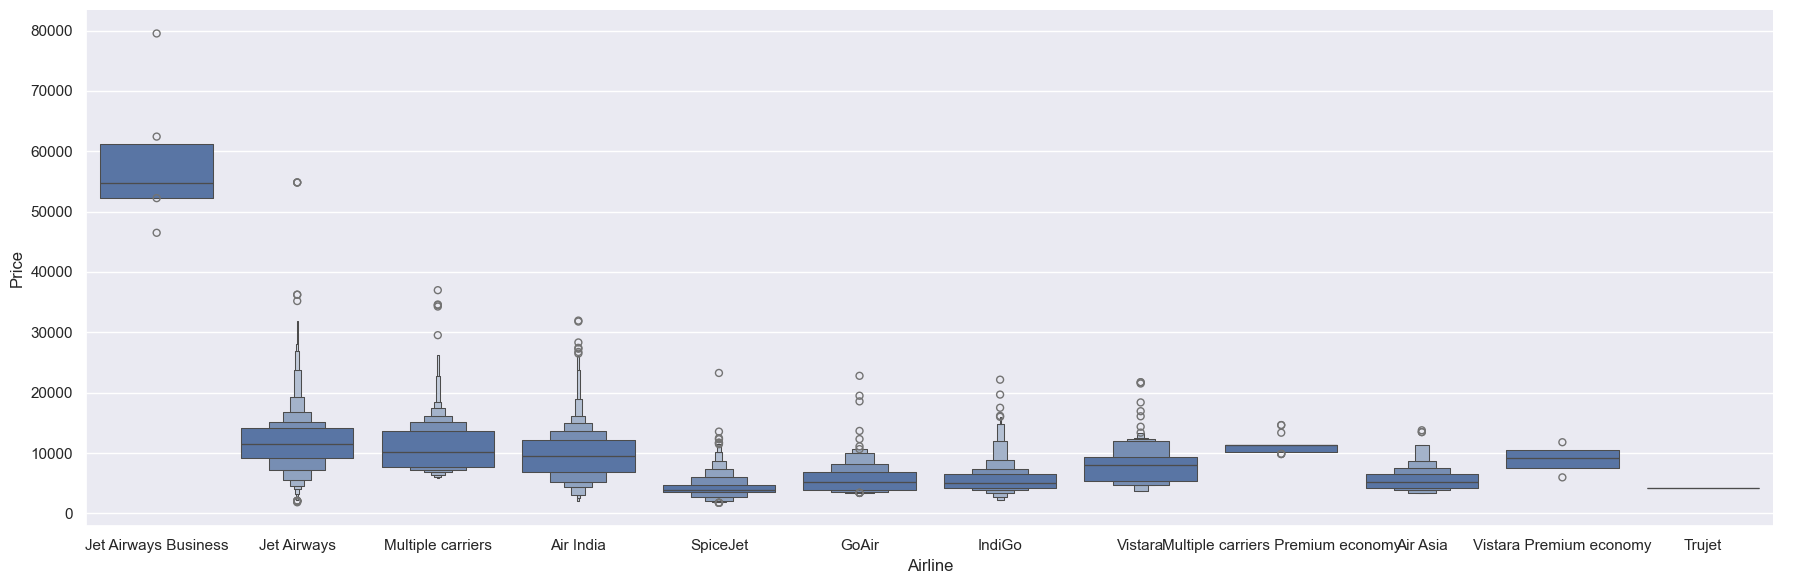

In [385]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<Figure size 800x600 with 0 Axes>

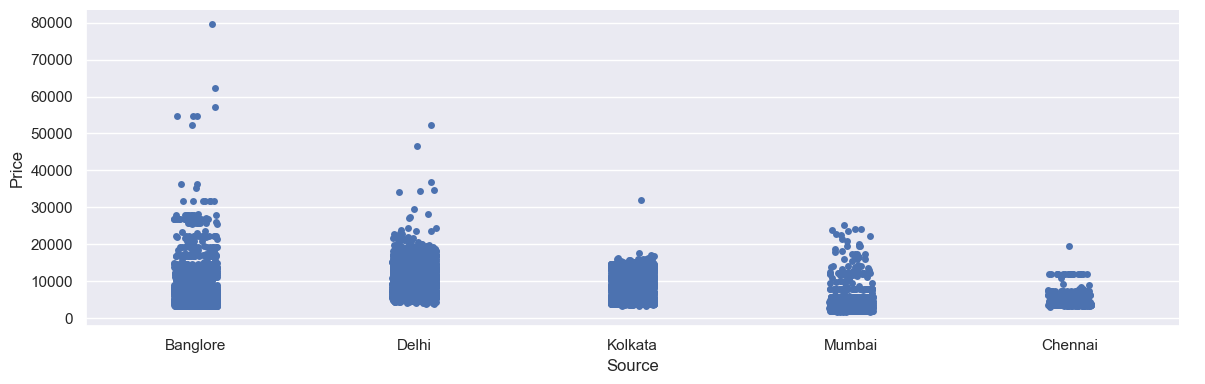

In [386]:
# Source vs Price
plt.figure(figsize=(8,6))
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), height = 4, aspect = 3)
plt.show()

In [387]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head(2)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False


In [388]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False


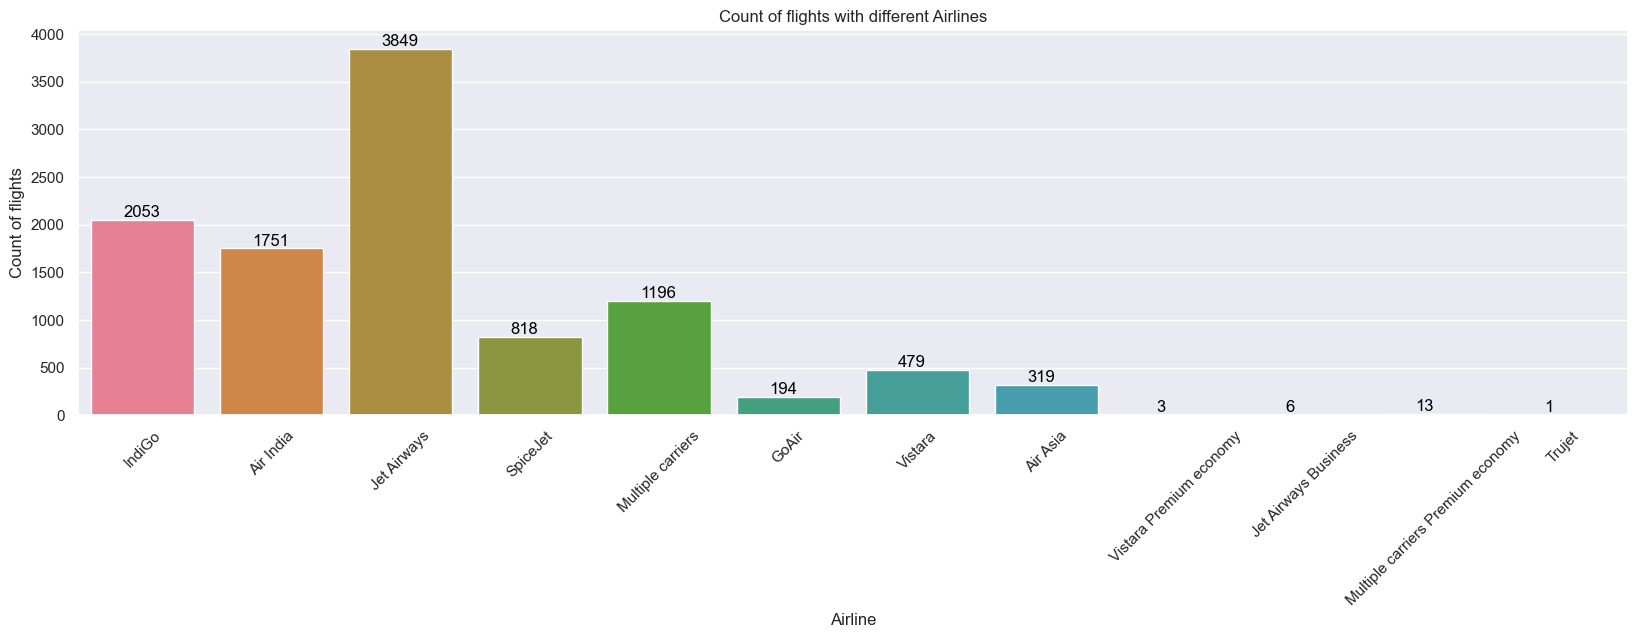

In [389]:
"""Inference: Now from the above graph we can see that between the type pf airline and count of flights we can see that
Jet airways has the most flight boarded."""

plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline',hue=train_data.Airline ,data =train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

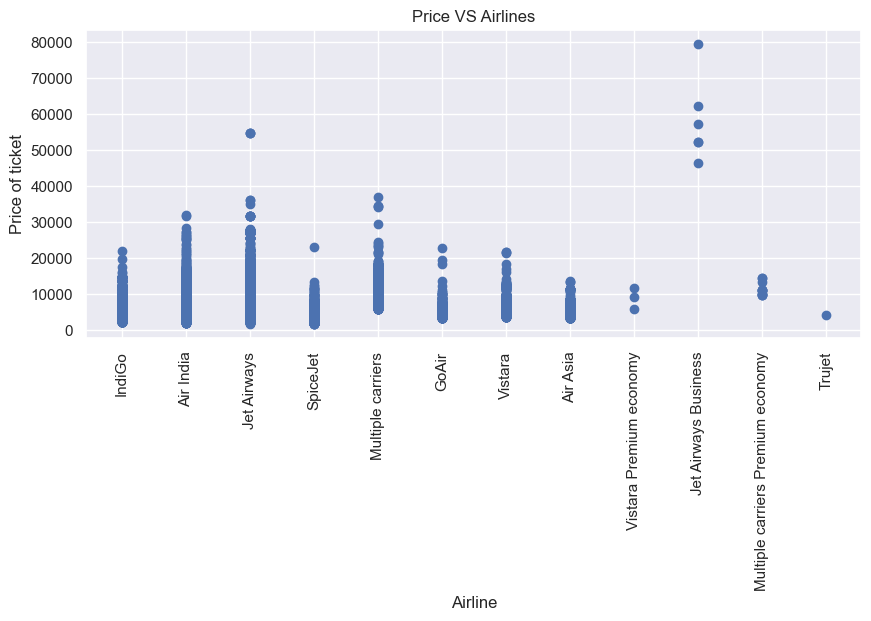

In [390]:
plt.figure(figsize = (10,4))
plt.title('Price VS Airlines')
plt.scatter(train_data['Airline'], train_data['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)
plt.show()

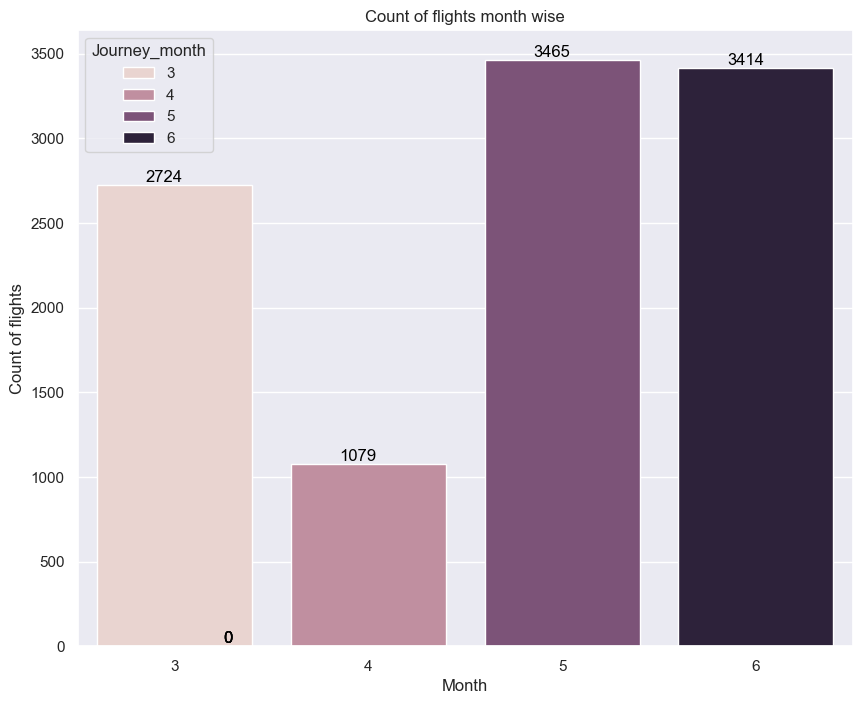

In [391]:
# Plotting Bar chart for Months (Duration) vs Number of Flights
"""May has max number of flights"""

plt.figure(figsize = (10, 8))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', hue=train_data.Journey_month,data = train_data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [392]:
#train_data["Route"]

In [393]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [394]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

#for total stops

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [395]:
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


In [396]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [397]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [398]:
#data_train.head()

---

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,




In [399]:
#This is train data and has price column we need to exclude it
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [400]:
#price column is excluded
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head(2)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,...,False,False,False,True,False,False,False,False,False,False


In [401]:
#this is the price column our target
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# End of EDA ,Now we will start model building and prediction 

In [402]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [403]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [404]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [405]:
y_pred = reg_rf.predict(X_test)

In [406]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1174.695903603052
RMSE: 2088.9959053950065


In [407]:
metrics.r2_score(y_test, y_pred)

0.7976118869577831

In [408]:
from sklearn.model_selection import RandomizedSearchCV

In [409]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ["sqrt", "log2", None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 6)]
max_depth.append(None)                                     #value can be cahnged ,by code=30
#criterion={"squared_error", "absolute_error", "poisson"},
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

bootstrap = [True, False]

In [410]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               #"criterion":criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                "bootstrap":bootstrap}

In [411]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations  

#n_iter = 100, cv = 10 ,u can
rf_randomRFG = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, random_state=42, n_jobs = -1,
                               error_score="raise")

In [412]:
import warnings
warnings.filterwarnings("ignore") 

In [413]:
rf_randomRFG.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 14, 23, 32, 41, 50,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [414]:
"""{'n_estimators': 700,
 'min_samples_split': 100,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 41,
 'bootstrap': False}"""

"{'n_estimators': 700,\n 'min_samples_split': 100,\n 'min_samples_leaf': 1,\n 'max_features': 'auto',\n 'max_depth': 41,\n 'bootstrap': False}"

In [415]:
rf_randomRFG.best_params_


{'n_estimators': 1100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 32,
 'bootstrap': False}

In [416]:
y_predictionRFG = rf_randomRFG.predict(X_test)

In [417]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predictionRFG))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predictionRFG)))

MAE: 1231.5246384872241
RMSE: 1924.1977693112256


In [418]:
metrics.r2_score(y_test,y_predictionRFG)

0.8282846032976295

In [419]:
"""from sklearn.model_selection import GridSearchCV


n_estimators = [700]
max_features = ['auto', 'sqrt']
max_depth = [41]
#max_depth.append(None)                                   
criterion=["squared_error", "absolute_error", "friedman_mse", "poisson"]
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
bootstrap = [True, False]


# Define the parameter grid for the grid search
# Create the random grid

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               "criterion":criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                "bootstrap":bootstrap}

# Perform the grid search
CV_rfc =  GridSearchCV(reg_rf,param_grid=param_grid, cv=2,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

# Print the best estimator
print('Best estimator:', CV_rfc.best_estimator_)
"""

'from sklearn.model_selection import GridSearchCV\n\n\nn_estimators = [700]\nmax_features = [\'auto\', \'sqrt\']\nmax_depth = [41]\n#max_depth.append(None)                                   \ncriterion=["squared_error", "absolute_error", "friedman_mse", "poisson"]\nmin_samples_split = [2, 5, 10, 15, 100]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 5, 10]\nbootstrap = [True, False]\n\n\n# Define the parameter grid for the grid search\n# Create the random grid\n\nparam_grid = {\'n_estimators\': n_estimators,\n               \'max_features\': max_features,\n               "criterion":criterion,\n               \'max_depth\': max_depth,\n               \'min_samples_split\': min_samples_split,\n               \'min_samples_leaf\': min_samples_leaf,\n                "bootstrap":bootstrap}\n\n# Perform the grid search\nCV_rfc =  GridSearchCV(reg_rf,param_grid=param_grid, cv=2,n_jobs=-1)\nCV_rfc.fit(X_train, y_train)\n\n# Print the best estimator\nprint(

In [420]:
"""{'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 41, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 700}
CV_rfc.best_params"""

"{'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': 41, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 700}\nCV_rfc.best_params"

"""{'bootstrap': True,
 'criterion': 'friedman_mse',
 'max_depth': 41,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 700}"""

In [421]:
reg_rf = RandomForestRegressor(n_estimators=700,bootstrap= True, criterion='friedman_mse', max_depth= 41, max_features= 'sqrt', min_samples_leaf=1, min_samples_split=10,)

In [422]:
reg_rf.fit(X_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=41,
                      max_features='sqrt', min_samples_split=10,
                      n_estimators=700)

In [423]:
y_predGrid=reg_rf.predict(X_test)

In [424]:
y_predGrid

array([16527.31260236,  5984.71839546,  8615.95361467, ...,
        6688.36958063, 12080.42457729, 12433.30569358])

In [425]:
metrics.r2_score(y_test,y_predGrid)

0.825857403667451

In [426]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predGrid))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predGrid)))

MAE: 1257.1179260746314
RMSE: 1937.749331197973


In [427]:
s=pd.Series(y_predGrid,name="predicted")
print(s)

0       16527.312602
1        5984.718395
2        8615.953615
3        3769.725970
4       13924.626667
            ...     
2132    10815.942021
2133     4936.294680
2134     6688.369581
2135    12080.424577
2136    12433.305694
Name: predicted, Length: 2137, dtype: float64


In [428]:
#y_test.reset_index(drop=True)

In [429]:
pd.DataFrame([y_test.reset_index(drop=True),s]).T.head(10)

,Price,predicted
0,16655.0,16527.312602
1,4959.0,5984.718395
2,9187.0,8615.953615
3,3858.0,3769.725970
4,12898.0,13924.626667
5,10529.0,10206.789546
6,16079.0,13718.291654
7,7229.0,6108.234459
8,10844.0,13264.128433
9,16289.0,14237.885662


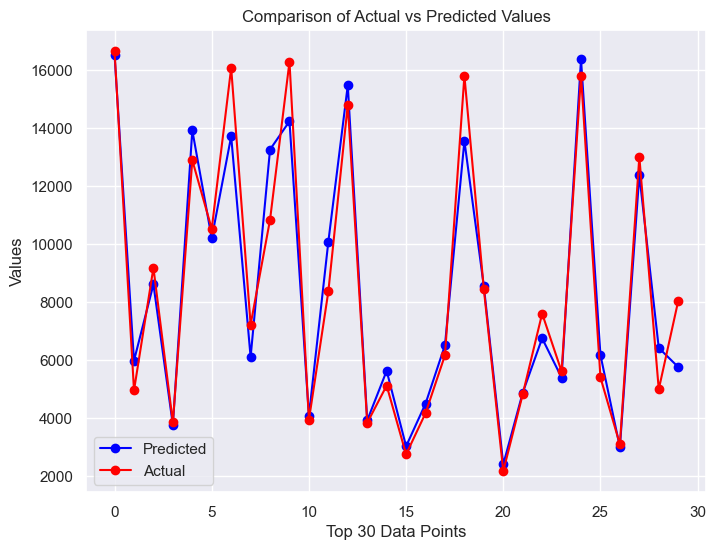

In [430]:

plt.figure(figsize=(8,6))
plt.plot(s.head(30), color='blue', marker='o', label='Predicted')
plt.plot(y_test.reset_index(drop=True).head(30), color='red', marker='o', label='Actual')

# Adding labels and title
plt.xlabel('Top 30 Data Points')
plt.ylabel('Values')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()

# Displaying the plot
plt.show()


# LinearRegression

In [431]:
from sklearn.linear_model import LinearRegression

In [432]:
linear=LinearRegression()

In [433]:
linear.fit(X_train,y_train)

LinearRegression()

In [434]:
y_pred=linear.predict(X_test)

In [435]:
metrics.r2_score(y_test,y_pred)

0.6195943729070094

In [436]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1972.937285514807
RMSE: 2863.9705929717834


In [437]:
s=pd.Series(y_pred,name="predicted")

In [438]:
pd.DataFrame([y_test.reset_index(drop=True),s]).T.head(10)

,Price,predicted
0,16655.0,13341.370632
1,4959.0,7639.703332
2,9187.0,9606.385254
3,3858.0,3675.309129
4,12898.0,11212.427980
5,10529.0,11171.755394
6,16079.0,10489.203859
7,7229.0,8675.480645
8,10844.0,10753.612860
9,16289.0,10888.816053


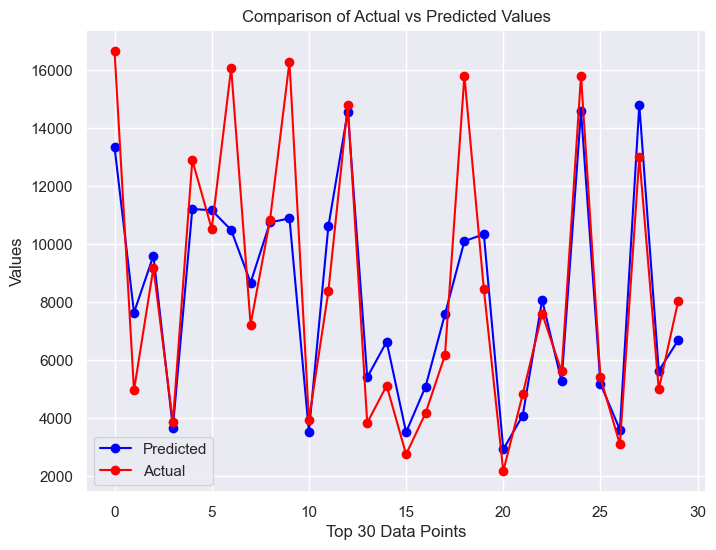

In [439]:

plt.figure(figsize=(8,6))
plt.plot(s.head(30), color='blue', marker='o', label='Predicted')
plt.plot(y_test.reset_index(drop=True).head(30), color='red', marker='o', label='Actual')

# Adding labels and title
plt.xlabel('Top 30 Data Points')
plt.ylabel('Values')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()

# Displaying the plot
plt.show()


# KNeighborsRegressor

In [440]:
from sklearn.neighbors import KNeighborsRegressor

In [441]:
clf = KNeighborsRegressor(n_neighbors = 5) 
clf.fit(X_train, y_train) 

KNeighborsRegressor()

In [442]:
y_pred=clf.predict(X_test)

In [443]:
training_score = clf.score(X_train, y_train) 

In [444]:
metrics.r2_score(y_test,y_pred)

0.5743709506218349

In [445]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1879.4638277959757
RMSE: 3029.428582404846


In [446]:
model = KNeighborsRegressor()

In [447]:
# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                   'weights': ['uniform', 'distance'],
                   'algorithm':[ 'ball_tree', 'kd_tree', 'brute'],
                   "leaf_size":[int(x) for x in np.linspace(stop=25,start=50,num=15)],
                   'p': [1, 2, 5]}

In [448]:

rf_random = RandomizedSearchCV(estimator = clf, param_distributions = hyperparameters,
  scoring='neg_mean_squared_error', n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs =-1)

In [449]:
clf

KNeighborsRegressor()

In [450]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [50, 48, 46, 44, 42, 41,
                                                      39, 37, 35, 33, 32, 30,
                                                      28, 26, 25],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10, 11, 12, 13, 14,
                                                        15],
                                        'p': [1, 2, 5],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [451]:
"""{'weights': 'distance',
 'p': 1,
 'n_neighbors': 4,
 'leaf_size': 33.92857142857143,
 'algorithm': 'ball_tree'}"""
rf_random.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 4,
 'leaf_size': 33,
 'algorithm': 'ball_tree'}

In [452]:
y_pred=rf_random.predict(X_test)

In [453]:
metrics.r2_score(y_pred,y_test)
#0.5386360073668998

0.5386360073668998

gridsearchcv for Kneighbour

In [454]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = KNeighborsRegressor()


In [455]:
# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                   'weights': ['distance'],
                   'algorithm':[ 'ball_tree'],
                   "leaf_size":[int(x) for x in np.linspace(stop=25,start=50,num=15)],
                   'p': [1, 2, 5]}

In [456]:
 # Print the best hyperparameters and score
#print('Best hyperparameters:', grid.best_params_)

In [457]:
# Tune the model using GridSearchCV
gridknei = GridSearchCV(model,param_grid=hyperparameters, cv=10,n_jobs=-1)

In [458]:
gridknei.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree'],
                         'leaf_size': [50, 48, 46, 44, 42, 41, 39, 37, 35, 33,
                                       32, 30, 28, 26, 25],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'p': [1, 2, 5], 'weights': ['distance']})

[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=6, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=6, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=6, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=7, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=7, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=9, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=9, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=9, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_ne

[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=9, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=9, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=9, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=9, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=9, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=9, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=9, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=9, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_ne

[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=3, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=3, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=3, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=3, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=4

[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=13, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=13, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=13, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=13, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=13, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=13, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=13, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=42.857142857142854, n_neighbors=14, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=42.8571428571428

[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=8, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=8, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=8, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=8, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=8, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=8, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=8, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=8, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=8

[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=2, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=2, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=2, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=2, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=2, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=2, p=5, weights=distance; total time=   0.5s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=2, p=5, weights=distance; total time=   0.5s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=3, p=5, weights=distance; total time=   0.5s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=3

[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=4, p=5, weights=distance; total time=   0.5s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=6, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=6, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=6, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=6, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=6, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=6, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=6, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=6

[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=7, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=7, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=7, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=7, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=7, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=7, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=7, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=8, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=41.07142857142857, n_neighbors=8

[CV] END algorithm=ball_tree, leaf_size=39.285714285714285, n_neighbors=15, p=5, weights=distance; total time=   0.9s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=3, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=3, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=3, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=3, p=5, weights=distance; total time=   0.5s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=3, p=5, weights=distance; total time=   0.5s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=

[CV] END algorithm=ball_tree, leaf_size=39.285714285714285, n_neighbors=14, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=39.285714285714285, n_neighbors=14, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=39.285714285714285, n_neighbors=14, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=39.285714285714285, n_neighbors=14, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=39.285714285714285, n_neighbors=15, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=39.285714285714285, n_neighbors=15, p=5, weights=distance; total time=   1.0s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=3, p=1, weights=distance; to

[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=9, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=9, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=9, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=9, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=11, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=11, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=11, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=11, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=11, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=11, p=2, w

[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=2, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=2, p=5, weights=distance; total time=   0.9s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=2, p=5, weights=distance; total time=   0.8s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=3, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=3, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=3, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=3, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=4, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_ne

[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=9, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=9, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=11, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=11, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=11, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=11, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=11, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=11, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=11, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=11, p=5,

[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=14, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=14, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=14, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=14, p=5, weights=distance; total time=   0.9s
[CV] END algorithm=ball_tree, leaf_size=37.5, n_neighbors=14, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=2, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=2, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=2, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=2, p=2, weights=distance; total time=   0.1s
[CV] END alg

[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=3, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=3, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=4, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=5, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=5, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=5, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=5, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=5, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_ne

[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=7, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=8, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=9, p=1, weights=distance; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=9, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=9, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=9, p=5, weights=distance; total time=   0.8s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=9, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_neighbors=10, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=35.714285714285715, n_n

[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=10, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=10, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=11, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=11, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=11, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=11, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=11, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=12, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_nei

[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=6, p=5, weights=distance; total time=   0.5s[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=13, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=13, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=13, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=14, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=14, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=14, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neighbors=14, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=33.92857142857143, n_neigh

[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=3, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=3, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=3, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=4, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=5, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=5, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=5

[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=7, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=7, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=7, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=8, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=8, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=8, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=8, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=8, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=9

[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=8, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=8, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=9, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=10, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=10, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=10, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=11, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=11, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighb

[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=11, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=11, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=11, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=11, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=11, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=12, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=13, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=13, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_nei

[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=14, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=14, p=5, weights=distance; total time=   0.8s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=14, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=15, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=30.357142857142858, n_neighbors=2, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=30.357142857142858, n_neighbors=2, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=30.357142857142858, n_neighbors=2, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=30.357142857142858, n_neighbors=2, p=5, weights=distance; total time=   0.4s
[CV] END algorithm=ball_tree, leaf_size=30.357142857142858, n_ne

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree'],
                         'leaf_size': [50.0, 48.214285714285715,
                                       46.42857142857143, 44.64285714285714,
                                       42.857142857142854, 41.07142857142857,
                                       39.285714285714285, 37.5,
                                       35.714285714285715, 33.92857142857143,
                                       32.14285714285714, 30.357142857142858,
                                       28.57142857142857, 26.785714285714285,
                                       25.0],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'p': [1, 2, 5], 'weights': ['distance']},
             verbose=2)

In [459]:
y_pred=gridknei.predict(X_test)

In [460]:

gridknei.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 50,
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

In [461]:
metrics.r2_score(y_test,y_pred)

0.6429701871305866

In [462]:
"""model = KNeighborsRegressor(algorithm ='ball_tree',
 leaf_size= 50.0,
 n_neighbors= 6,
 p= 1,
)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)"""

"model = KNeighborsRegressor(algorithm ='ball_tree',\n leaf_size= 50.0,\n n_neighbors= 6,\n p= 1,\n)\nmodel.fit(X_train,y_train)\ny_pred=model.predict(X_test)"

In [463]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1787.1119088599214
RMSE: 2774.5804970292775


In [464]:
pd.Series(y_pred)

0       16350.220126
1        5123.861210
2        8558.224719
3        4458.000000
4       12735.066667
            ...     
2132    13587.000000
2133     5200.076457
2134     6470.147605
2135    13339.000000
2136    11492.107143
Length: 2137, dtype: float64

In [465]:
sp1=pd.Series(y_pred,name="Predicted")

In [466]:
sp1

0       16350.220126
1        5123.861210
2        8558.224719
3        4458.000000
4       12735.066667
            ...     
2132    13587.000000
2133     5200.076457
2134     6470.147605
2135    13339.000000
2136    11492.107143
Name: Predicted, Length: 2137, dtype: float64

In [467]:
pd.DataFrame([y_test.reset_index(drop=True),sp1]).T.head(10)

,Price,Predicted
0,16655.0,16350.220126
1,4959.0,5123.861210
2,9187.0,8558.224719
3,3858.0,4458.000000
4,12898.0,12735.066667
5,10529.0,10843.043165
6,16079.0,11924.000000
7,7229.0,6130.875000
8,10844.0,14781.000000
9,16289.0,12898.000000


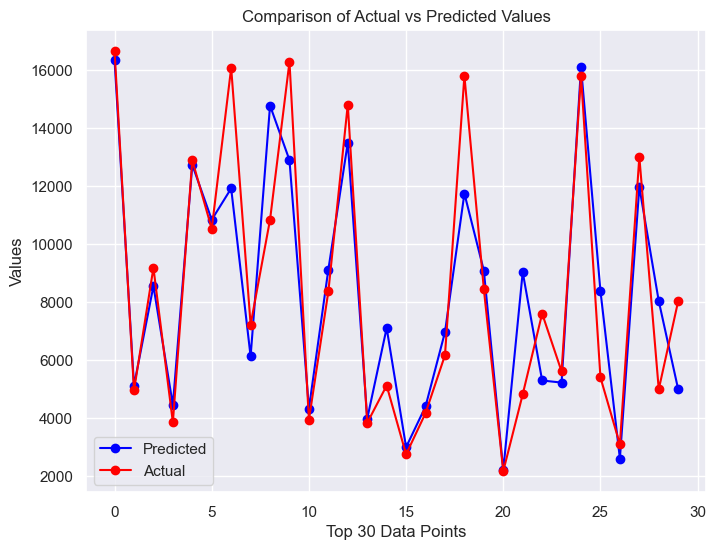

In [468]:

plt.figure(figsize=(8,6))
plt.plot(sp1.head(30), color='blue', marker='o', label='Predicted')
plt.plot(y_test.reset_index(drop=True).head(30), color='red', marker='o', label='Actual')

# Adding labels and title
plt.xlabel('Top 30 Data Points')
plt.ylabel('Values')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()

# Displaying the plot
plt.show()


# GradientBoostingRegressor

In [469]:
from sklearn.ensemble import GradientBoostingRegressor

In [470]:
grad=GradientBoostingRegressor()

In [471]:
grad.fit(X_train,y_train)

GradientBoostingRegressor()

In [472]:
y_pred=grad.predict(X_test)

In [473]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1527.4424635218923
MSE: 4618822.420905855
RMSE: 2149.1445788745473


In [474]:
metrics.r2_score(y_test,y_pred)

0.7857893351419297

In [475]:
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import GridSearchCV



# Define the model
model = GradientBoostingRegressor()

# Define the hyperparameters to tune
hyperparameters = {'n_estimators': [100,200,500,700,1000],
                   'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
                   'max_depth': [3, 5, 7,9,12],
                   'learning_rate': [0.01, 0.1,0.2,0.3,0.4 ,0.5],
                    'criterion':['friedman_mse', 'squared_error']}

# Tune the model using GridSearchCV
#grid = GridSearchCV(model,, hyperparameters, cv=5)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations  

#n_iter = 100, cv = 10 ,u can
grid_after_cv= RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = -1)





In [476]:
grid_after_cv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END algorithm=brute, leaf_size=37, n_neighbors=13, p=1, weights=uniform; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=32, n_neighbors=5, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=26, n_neighbors=8, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=26, n_neighbors=2, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=brute, leaf_size=25, n_neighbors=14, p=5, weights=uniform; total time=   4.4s
[CV] END algorithm=brute, leaf_size=37, n_neighbors=12, p=2, weights=distance; total time=   0.5s
[CV] END algorithm=brute, leaf_size=37, n_neighbors=12, p=2, weights=distance; total time=   0.5s
[CV] END algorithm=brute, leaf_size=25, n_neighbors=8, p=2, weights=distance; total time=   0.4s
[CV] END algorithm=ball_tree, leaf_size=48, n_neighbors=9, p=5, weights=uniform; total time=   1.2s
[CV] END algorithm=kd_tree, leaf_size=44, n_neighb

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(criterion='friedman_mse',
                                                   max_depth=41,
                                                   max_features='sqrt',
                                                   min_samples_split=10,
                                                   n_estimators=700),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 14, 23, 32, 41, 50,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [477]:
# Print the best hyperparameters and score


"""Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}"""




"Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}"

In [478]:
print('Best hyperparameters:', grid_after_cv.best_params_)

Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 41, 'bootstrap': True}


In [479]:
y_pred_GBRegressor=grid_after_cv.predict(X_test)

In [480]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_GBRegressor))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_GBRegressor))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_GBRegressor)))

MAE: 1145.0383568398513
MSE: 4028588.342349386
RMSE: 2007.1343608113


In [481]:
r2_score=metrics.r2_score(y_test,y_pred_GBRegressor)
print(r2_score)

0.8131630730490639


# doing grid serach cv

In [482]:
from sklearn.model_selection import GridSearchCV

In [483]:
# Define the hyperparameters to tune
hyperparameters = {'n_estimators': [400],
                   'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
                   'max_depth': [3, 5,9,12],
                   'learning_rate': [0.01,0.2,0.3,0.4 ,0.5],
                    'criterion':['friedman_mse', 'squared_error']}

In [484]:
model_for_GrBRegressor=GradientBoostingRegressor(criterion= 'friedman_mse',
 learning_rate= 0.3,
 loss= 'huber',
 max_depth= 3,
 n_estimators= 400)

In [485]:
#grid_GridSearchCV= GridSearchCV(model_for_GrBRegressor,param_grid=hyperparameters, cv=2,n_jobs=-1)

In [486]:
#grid_GridSearchCV.fit(X_train,y_train)

In [487]:
"""{'criterion': 'friedman_mse',
 'learning_rate': 0.3,
 'loss': 'huber',
 'max_depth': 3,
 'n_estimators': 400}"""

"{'criterion': 'friedman_mse',\n 'learning_rate': 0.3,\n 'loss': 'huber',\n 'max_depth': 3,\n 'n_estimators': 400}"

In [488]:
model_for_GrBRegressor.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.3, loss='huber', n_estimators=400)

In [489]:
#grid_GridSearchCV.best_params_

In [490]:
#y_predGBR=grid_GridSearchCV.predict(X_test)


In [491]:
y_predGBRgrid=model_for_GrBRegressor.predict(X_test)

In [492]:
from sklearn.metrics import r2_score
r2_scor=r2_score(y_test,y_predGBRgrid)
print(r2_scor)

0.8444982631121868


In [493]:
print('MAE:', metrics.mean_absolute_error(y_test, model_for_GrBRegressor.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model_for_GrBRegressor.predict(X_test))))

MAE: 1214.2848008233768
RMSE: 1831.1027304004585


In [494]:
y_test.reset_index(drop=True).head(10)

0    16655
1     4959
2     9187
3     3858
4    12898
5    10529
6    16079
7     7229
8    10844
9    16289
Name: Price, dtype: int64

In [495]:
s2=pd.Series(y_predGBRgrid,name="predicted")

pd.DataFrame([y_test.reset_index(drop=True),s2]).T.head(10)

,Price,predicted
0,16655.0,17766.379778
1,4959.0,5892.158427
2,9187.0,8545.703032
3,3858.0,3753.747977
4,12898.0,14166.368415
5,10529.0,9760.796977
6,16079.0,13429.456150
7,7229.0,5500.207220
8,10844.0,12987.883922
9,16289.0,13446.316243


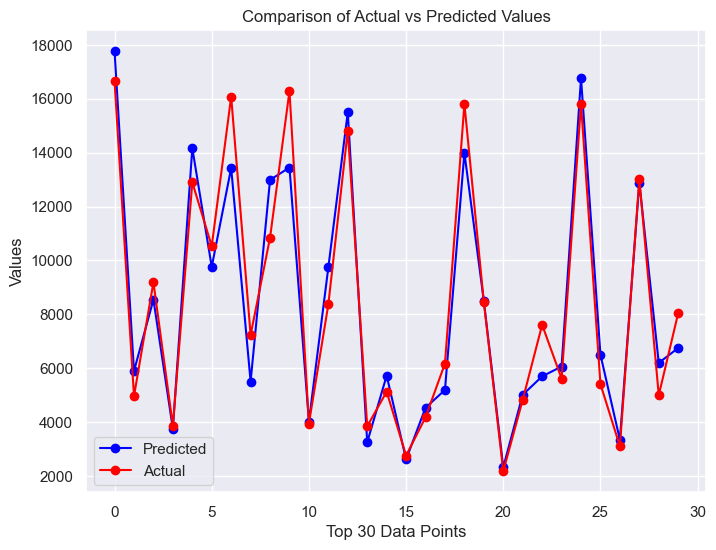

In [496]:

plt.figure(figsize=(8,6))
plt.plot(s2.head(30), color='blue', marker='o', label='Predicted')
plt.plot(y_test.reset_index(drop=True).head(30), color='red', marker='o', label='Actual')

# Adding labels and title
plt.xlabel('Top 30 Data Points')
plt.ylabel('Values')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()

# Displaying the plot
plt.show()


# Comparison of models

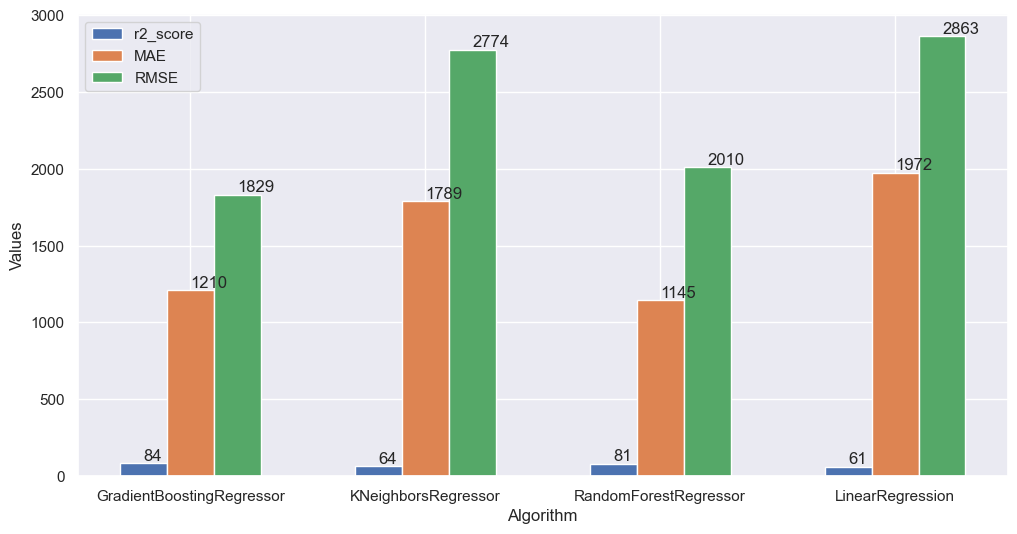

In [497]:
import numpy as np 
import matplotlib.pyplot as plt 

X = ['GradientBoostingRegressor','KNeighborsRegressor','RandomForestRegressor','LinearRegression'] 
r2_score = [84,64,81,61] 
MAE = [1210,1789,1145,1972] 
RMSE=[1829,2774,2010,2863]

X_axis = np.arange(len(X)) 

bar_width = 0.2
plt.figure(figsize=(12,6))
bar1 = plt.bar(X_axis - bar_width, r2_score, bar_width, label = 'r2_score') 
bar2 = plt.bar(X_axis, MAE, bar_width, label = 'MAE') 
bar3 = plt.bar(X_axis + bar_width, RMSE, bar_width, label = 'RMSE')

plt.xticks(X_axis, X) 
plt.xlabel("Algorithm") 
plt.ylabel("Values") 

# Adding the text labels at the top of each bar
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom') # va: vertical alignment y positional argument

for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

for bar in bar3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

#plt.title("Number of Students in each group") 
#plt.grid()
plt.legend() 
plt.show()
